<a href="https://colab.research.google.com/github/ipediz/BachehayekhafaneTMU/blob/main/Panel_OLS_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This code was written with the aid of ChatGPT**

In [52]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from linearmodels.panel import PanelOLS
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt  # This line is crucial for plt to be recognized
import geopandas as gpd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from linearmodels.panel import PanelOLS

# ignore potential convergence warnings; for some small penalty levels,
# tried out, optimization might not converge
warnings.simplefilter('ignore')

In [53]:
Data = pd.read_csv("The_new_all_state_replication_data.csv")
Data['interaction'] = Data['interaction'] / 100
Data['percent_over_60'] = Data['percent_over_60'] / 100
# setting 'county_code' as index and 'new_timeperiod' as time



In [54]:
from tabulate import tabulate
#dropping non-relative variables for summary statistics table
columns_to_drop = [
    'relative_time_m8andbeyond', 'relative_time_m7', 'relative_time_m6', 'relative_time_m5',
    'relative_time_m4', 'relative_time_m3', 'relative_time_m2', 'relative_time_m1', 'relative_time_0',
    'relative_time_p1', 'relative_time_p2', 'relative_time_p3', 'relative_time_p4',
    'relative_time_p5', 'relative_time_p6', 'relative_time_p7', 'relative_time_p8andbeyond'
]
Data = Data.set_index(['county_code', 'new_timeperiod'])
# Create a new dataframe without the specified columns
Data1 = Data.drop(columns=columns_to_drop)

In [55]:
# Generate summary statistics for all numerical columns

Data1_Summary_Statistics = Data1.describe()

# Convert the summary statistics DataFrame to a format that tabulate can handle
table = tabulate(Data1_Summary_Statistics, headers=Data1_Summary_Statistics.columns, tablefmt='fancy_grid')

# Print the beautiful table
print(table)

╒═══════╤══════════════════════════╤═════════════════════════╤══════════════════╤═════════════════════════╤════════════════════════╤════════════════════╤═══════════════╤═════════════════════════╤══════════════╤═══════════════╤════════════════════════════════════╤═════════════════════════════════╤═══════════════════╤═══════════════╕
│       │   lending_club_available │   bankruptcy_per_capita │   log_bankruptcy │   population_estimation │   employed_individuals │   monthly_earnings │   labor_force │   medianhouseholdincome │   cem_strata │   cem_weights │   nonbusiness_bankruptcy_percapita │   business_bankruptcy_percapita │   percent_over_60 │   interaction │
╞═══════╪══════════════════════════╪═════════════════════════╪══════════════════╪═════════════════════════╪════════════════════════╪════════════════════╪═══════════════╪═════════════════════════╪══════════════╪═══════════════╪════════════════════════════════════╪═════════════════════════════════╪═══════════════════╪═══════════════

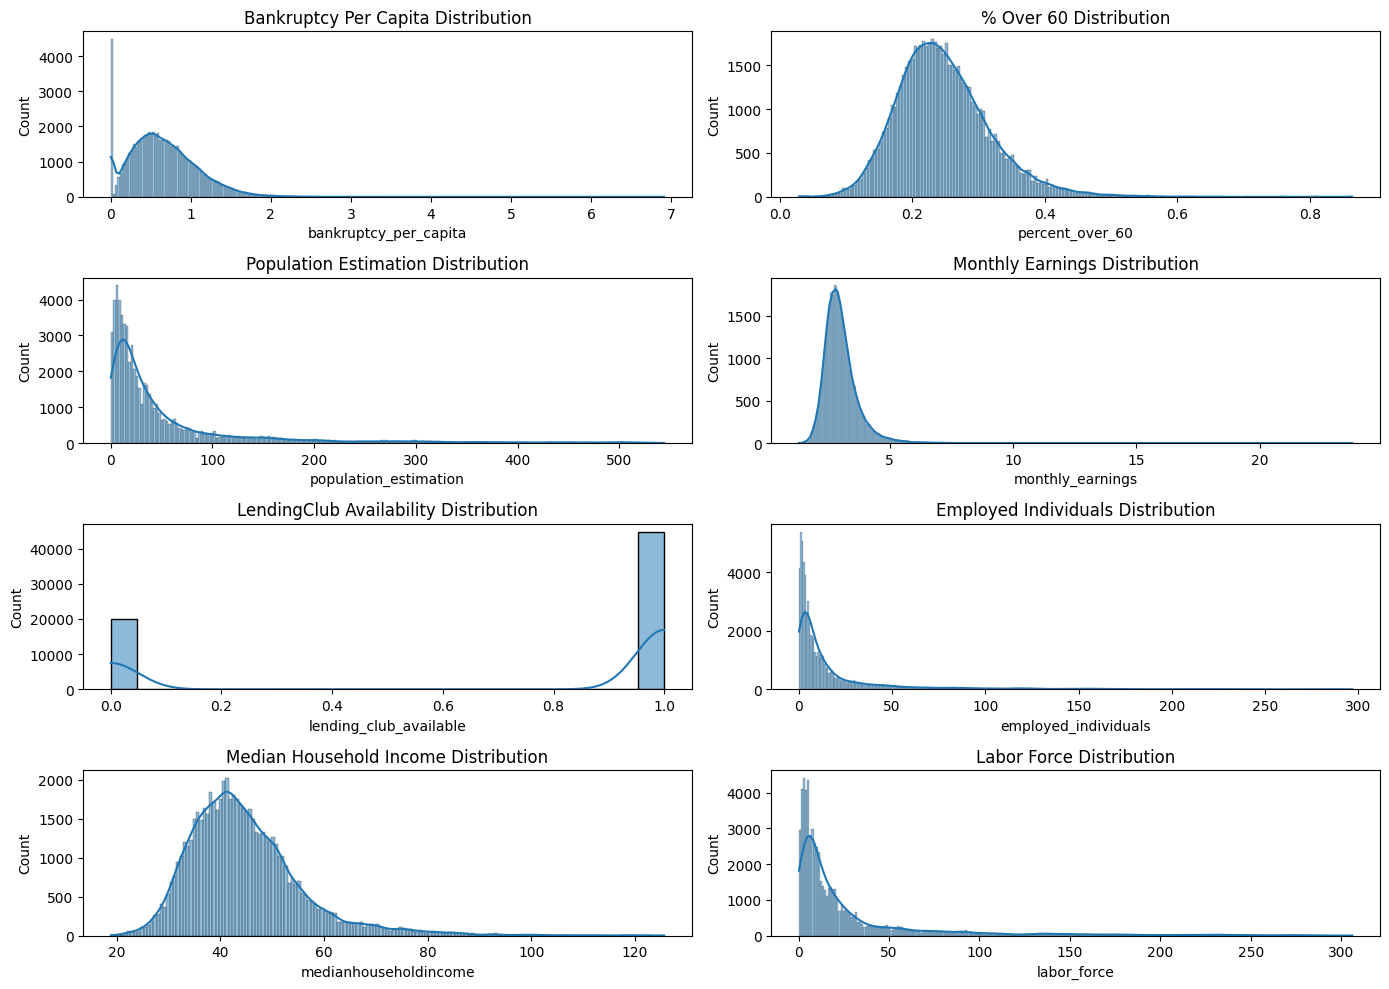

In [48]:
fig, axes = plt.subplots(4, 2, figsize=(14, 10))
sns.histplot(Data['bankruptcy_per_capita'], kde=True, ax=axes[0, 0]).set(title='Bankruptcy Per Capita Distribution')
sns.histplot(Data['percent_over_60'], kde=True, ax=axes[0, 1]).set(title='% Over 60 Distribution')
sns.histplot(Data['population_estimation'], kde=True, ax=axes[1, 0]).set(title='Population Estimation Distribution')
sns.histplot(Data['monthly_earnings'], kde=True, ax=axes[1, 1]).set(title='Monthly Earnings Distribution')
sns.histplot(Data['lending_club_available'], kde=True, ax=axes[2, 0]).set(title='LendingClub Availability Distribution')
sns.histplot(Data['employed_individuals'], kde=True, ax=axes[2, 1]).set(title='Employed Individuals Distribution')
sns.histplot(Data['medianhouseholdincome'], kde=True, ax=axes[3, 0]).set(title='Median Household Income Distribution')
sns.histplot(Data['labor_force'], kde=True, ax=axes[3, 1]).set(title='Labor Force Distribution')
plt.tight_layout()
plt.show()


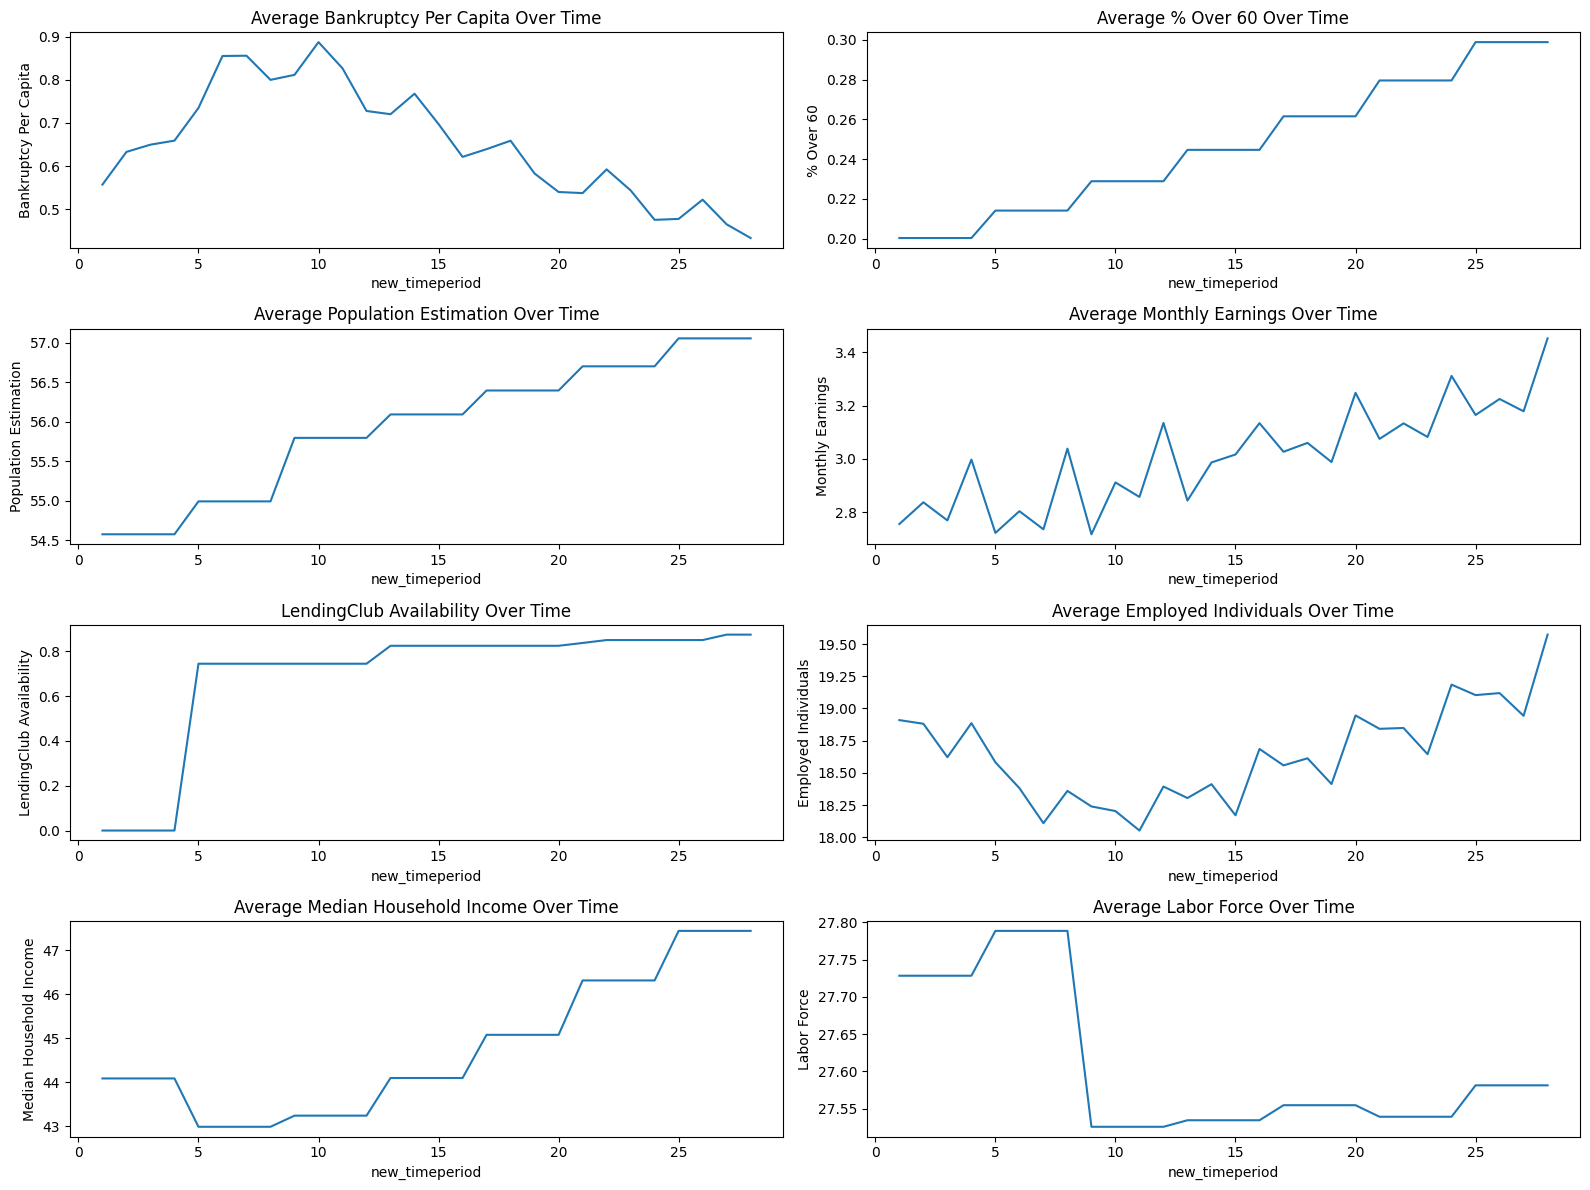

In [57]:
fig, axes = plt.subplots(4, 2, figsize=(16, 12))

# Time series plot for the same variables, showing how they evolve over time
Data.groupby('new_timeperiod')['bankruptcy_per_capita'].mean().plot(ax=axes[0, 0])
axes[0, 0].set_title('Average Bankruptcy Per Capita Over Time')
axes[0, 0].set_ylabel('Bankruptcy Per Capita')

Data.groupby('new_timeperiod')['percent_over_60'].mean().plot(ax=axes[0, 1])
axes[0, 1].set_title('Average % Over 60 Over Time')
axes[0, 1].set_ylabel('% Over 60')

Data.groupby('new_timeperiod')['population_estimation'].mean().plot(ax=axes[1, 0])
axes[1, 0].set_title('Average Population Estimation Over Time')
axes[1, 0].set_ylabel('Population Estimation')

Data.groupby('new_timeperiod')['monthly_earnings'].mean().plot(ax=axes[1, 1])
axes[1, 1].set_title('Average Monthly Earnings Over Time')
axes[1, 1].set_ylabel('Monthly Earnings')

Data.groupby('new_timeperiod')['lending_club_available'].mean().plot(ax=axes[2, 0])
axes[2, 0].set_title('LendingClub Availability Over Time')
axes[2, 0].set_ylabel('LendingClub Availability')

Data.groupby('new_timeperiod')['employed_individuals'].mean().plot(ax=axes[2, 1])
axes[2, 1].set_title('Average Employed Individuals Over Time')
axes[2, 1].set_ylabel('Employed Individuals')

Data.groupby('new_timeperiod')['medianhouseholdincome'].mean().plot(ax=axes[3, 0])
axes[3, 0].set_title('Average Median Household Income Over Time')
axes[3, 0].set_ylabel('Median Household Income')

Data.groupby('new_timeperiod')['labor_force'].mean().plot(ax=axes[3, 1])
axes[3, 1].set_title('Average Labor Force Over Time')
axes[3, 1].set_ylabel('Labor Force')

plt.tight_layout()
plt.show()

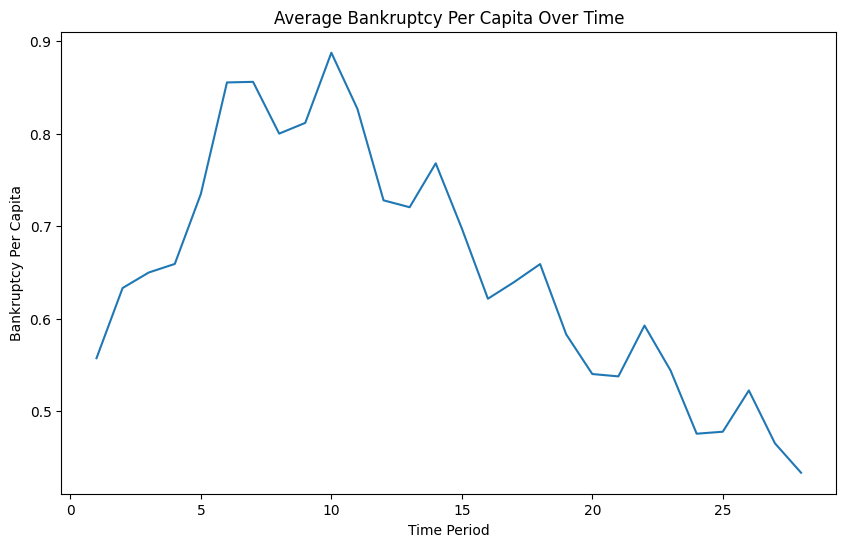

In [30]:
Data.groupby('new_timeperiod')['bankruptcy_per_capita'].mean().plot(figsize=(10, 6))
plt.title('Average Bankruptcy Per Capita Over Time')
plt.ylabel('Bankruptcy Per Capita')
plt.xlabel('Time Period')
plt.show()

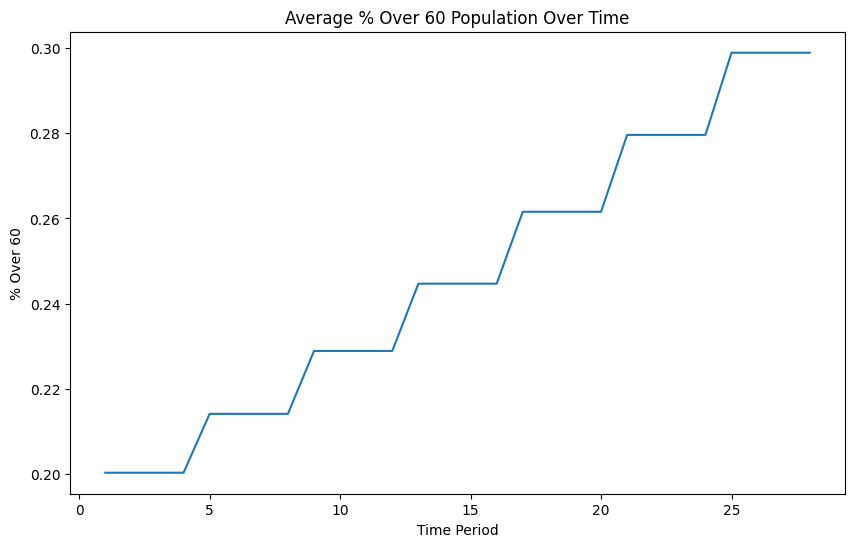

In [31]:
Data.groupby('new_timeperiod')['percent_over_60'].mean().plot(figsize=(10, 6))
plt.title('Average % Over 60 Population Over Time')
plt.ylabel('% Over 60')
plt.xlabel('Time Period')
plt.show()

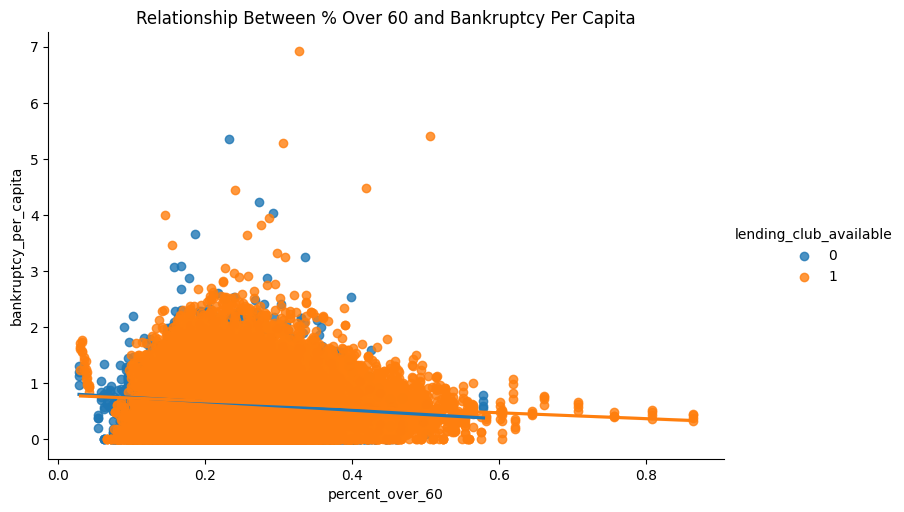

In [32]:
sns.lmplot(data=Data.reset_index(), x='percent_over_60', y='bankruptcy_per_capita', hue='lending_club_available', aspect=1.5)
plt.title('Relationship Between % Over 60 and Bankruptcy Per Capita')
plt.show()

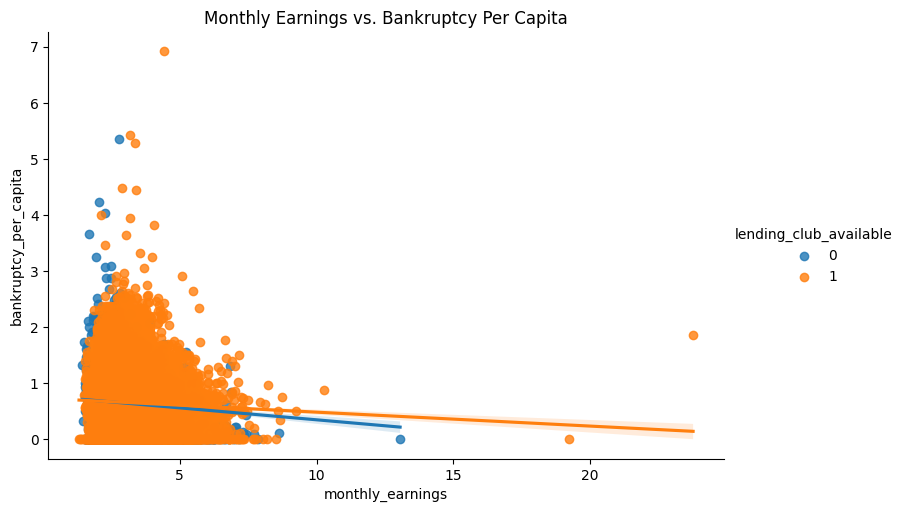

In [58]:
sns.lmplot(data=Data.reset_index(), x='', y='bankruptcy_per_capita', hue='lending_club_available', aspect=1.5)
plt.title('Monthly Earnings vs. Bankruptcy Per Capita')
plt.show()

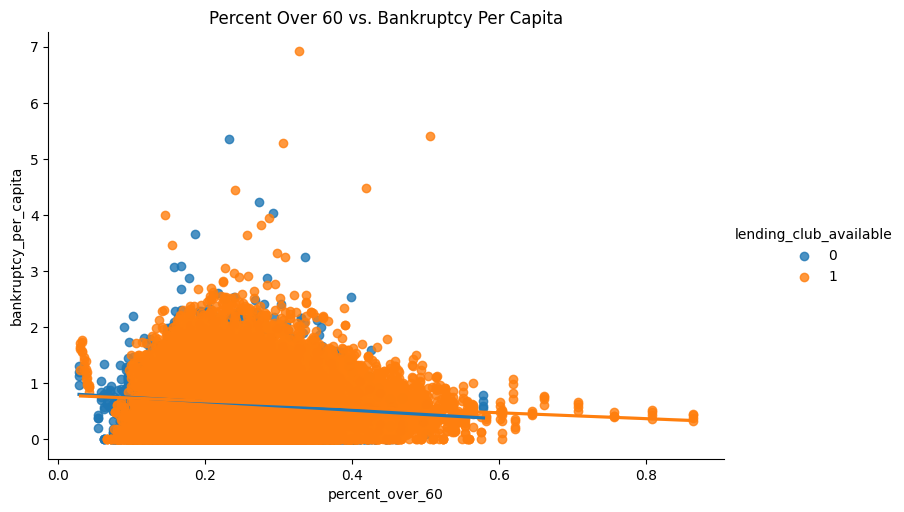

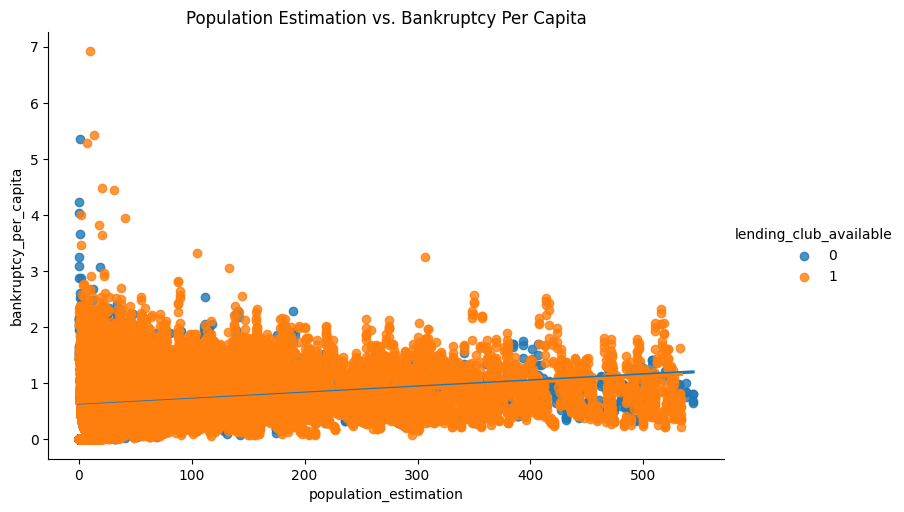

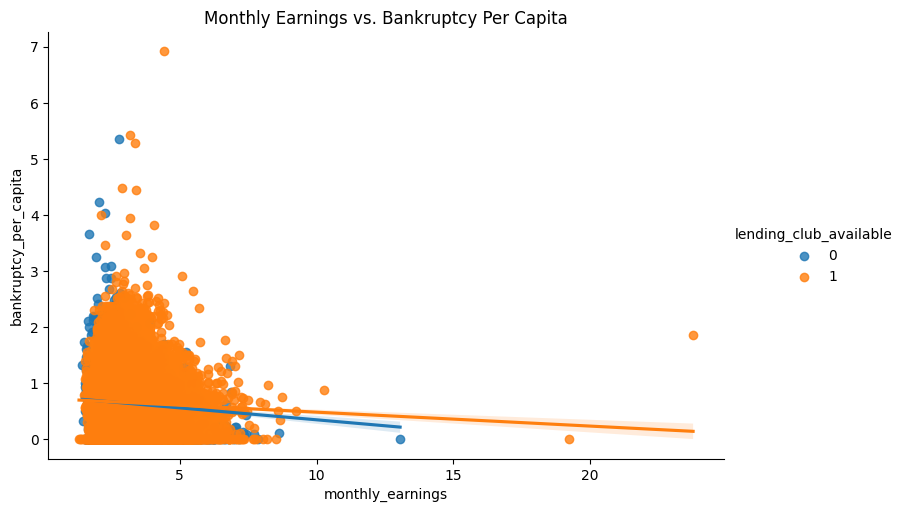

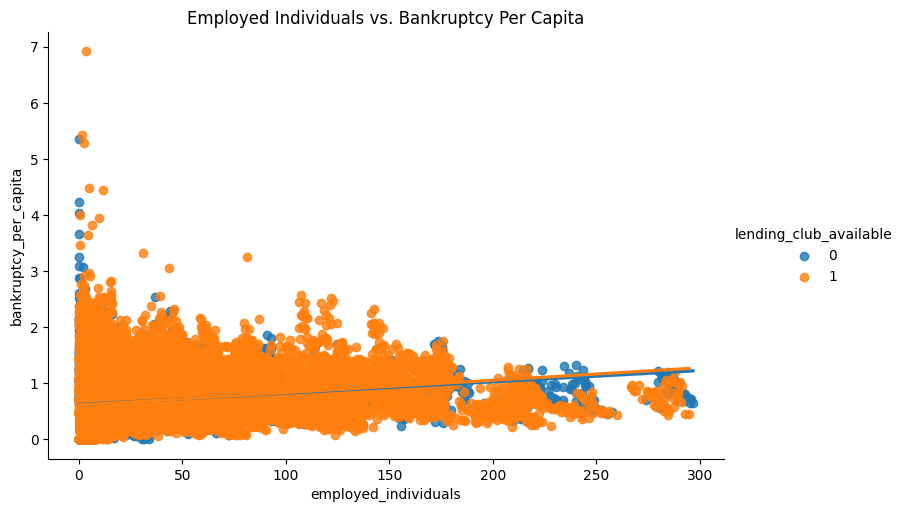

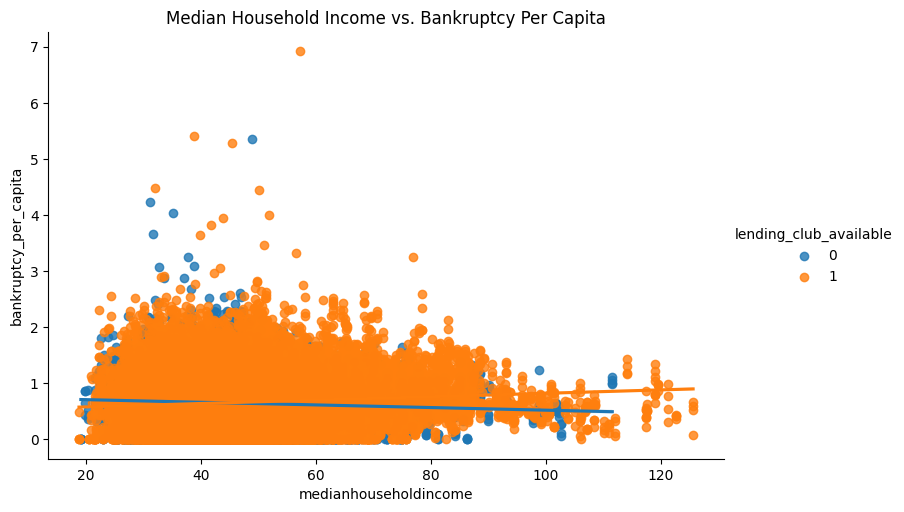

In [59]:
import matplotlib.pyplot as plt

# Reset index if needed
Data_reset = Data.reset_index()

# Create a grid of plots
variables = ['percent_over_60', 'population_estimation', 'monthly_earnings', 'employed_individuals', 'medianhouseholdincome']
titles = {
    'percent_over_60': 'Percent Over 60 vs. Bankruptcy Per Capita',
    'population_estimation': 'Population Estimation vs. Bankruptcy Per Capita',
    'monthly_earnings': 'Monthly Earnings vs. Bankruptcy Per Capita',
    'employed_individuals': 'Employed Individuals vs. Bankruptcy Per Capita',
    'medianhouseholdincome': 'Median Household Income vs. Bankruptcy Per Capita'
}

# Loop through each variable and create an lmplot for each
for var in variables:
    sns.lmplot(data=Data_reset, x=var, y='bankruptcy_per_capita', hue='lending_club_available', aspect=1.5)
    plt.title(titles[var])
    plt.show()

In [25]:
Data1 = Data1.dropna()
train, test = train_test_split(Data1, test_size=0.20, random_state=123)
train = train.set_index(['county_code', 'new_timeperiod'])

KeyError: "None of ['county_code', 'new_timeperiod'] are in the columns"

Regression Model


In [40]:
model_base = 'bankruptcy_per_capita ~ lending_club_available + interaction + population_estimation + employed_individuals + medianhouseholdincome + percent_over_60'
base_model = PanelOLS.from_formula(model_base, data=Data, weights=Data['cem_weights'])
results_base = base_model.fit(cov_type='clustered', cluster_entity=True)


In [42]:

from statsmodels.iolib.summary2 import summary_col

In [44]:
# Extract coefficients, standard errors, t-stats, and p-values
params = results_base.params
stderr = results_base.std_errors
tstats = results_base.tstats
pvalues = results_base.pvalues

# Create a DataFrame to hold these results in table format
table_data = {
    "Coefficient": params,
    "Std. Error": stderr,
    "T-statistic": tstats,
    "P-value": pvalues,
    "Significance": ["***" if p < 0.01 else "**" if p < 0.05 else "*" if p < 0.1 else "" for p in pvalues]
}
results_df = pd.DataFrame(table_data)

# Display in a formatted table
print("\nAcademic-style Regression Table:")
print(tabulate(results_df, headers="keys", tablefmt="fancy_grid"))

# Additional model metrics
metrics = {
    "R-squared": results_base.rsquared,
    "Adj R-squared": results_base.rsquared_within,
    "MSE": np.mean(results_base.resids**2)
}
print("\nAdditional Model Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.3f}")


Academic-style Regression Table:
╒════════════════════════╤═══════════════╤══════════════╤═══════════════╤═════════════╤════════════════╕
│                        │   Coefficient │   Std. Error │   T-statistic │     P-value │ Significance   │
╞════════════════════════╪═══════════════╪══════════════╪═══════════════╪═════════════╪════════════════╡
│ lending_club_available │    0.550075   │  0.0329064   │      16.7163  │ 0           │ ***            │
├────────────────────────┼───────────────┼──────────────┼───────────────┼─────────────┼────────────────┤
│ interaction            │   -2.37261    │  0.131678    │     -18.0183  │ 0           │ ***            │
├────────────────────────┼───────────────┼──────────────┼───────────────┼─────────────┼────────────────┤
│ population_estimation  │    0.00271108 │  0.000363816 │       7.45179 │ 9.32587e-14 │ ***            │
├────────────────────────┼───────────────┼──────────────┼───────────────┼─────────────┼────────────────┤
│ employed_individual

In [47]:
model_base = 'bankruptcy_per_capita ~ lending_club_available + interaction + population_estimation + employed_individuals + medianhouseholdincome + percent_over_60'
base_model = PanelOLS.from_formula(model_base, data=Data, weights=Data['cem_weights'])
results_base = base_model.fit(cov_type='clustered', cluster_entity=True)

# Extract results
params = results_base.params
stderr = results_base.std_errors
tstats = results_base.tstats
pvalues = results_base.pvalues

# Organize data into a DataFrame
table_data = {
    "Coefficient": params,
    "Std. Error": stderr,
    "T-statistic": tstats,
    "P-value": pvalues,
    "Significance": ["***" if p < 0.01 else "**" if p < 0.05 else "*" if p < 0.1 else "" for p in pvalues]
}
results_df = pd.DataFrame(table_data)

# Step 2: Additional metrics for the LaTeX table footer
r_squared = results_base.rsquared
adj_r_squared = results_base.rsquared_within
mse = np.mean(results_base.resids**2)

# Step 3: Export to LaTeX format with styling
latex_table = results_df.to_latex(float_format="%.3f", index=True,
                                  column_format="lcccc",  # Define column alignment
                                  caption="Regression Results for Panel OLS Model",
                                  label="tab:regression_results")

# Add custom footer for additional metrics
footer = f"\\textbf{{R-squared}}: {r_squared:.3f} \\quad \\textbf{{Adj. R-squared}}: {adj_r_squared:.3f} \\quad \\textbf{{MSE}}: {mse:.3f}"

# Combine LaTeX code for a complete table with footer
latex_complete = f"{latex_table}\n\\hline\n{footer}\n\\end{{table}}"

# Output to a .tex file (optional)
with open("regression_results.tex", "w") as f:
    f.write(latex_complete)

# Print to check LaTeX code
print(latex_complete)

\begin{table}
\caption{Regression Results for Panel OLS Model}
\label{tab:regression_results}
\begin{tabular}{lcccc}
\toprule
 & Coefficient & Std. Error & T-statistic & P-value & Significance \\
\midrule
lending_club_available & 0.550 & 0.033 & 16.716 & 0.000 & *** \\
interaction & -2.373 & 0.132 & -18.018 & 0.000 & *** \\
population_estimation & 0.003 & 0.000 & 7.452 & 0.000 & *** \\
employed_individuals & -0.004 & 0.001 & -5.426 & 0.000 & *** \\
medianhouseholdincome & 0.004 & 0.001 & 6.630 & 0.000 & *** \\
percent_over_60 & 1.838 & 0.108 & 16.950 & 0.000 & *** \\
\bottomrule
\end{tabular}
\end{table}

\hline
\textbf{R-squared}: 0.717 \quad \textbf{Adj. R-squared}: -0.046 \quad \textbf{MSE}: 0.173
\end{table}
